## In Depth Decision Tree and Random Forest:

- Previously we have looked in depth at a simple generative classifier (naive Bayes; see
“In Depth: Naive Bayes Classification” on page 382) and a powerful discriminative
classifier (support vector machines; see “In-Depth: Support Vector Machines” on
page 405). Here we’ll take a look at motivating another powerful algorithm—a non‐
parametric algorithm called random forests. Random forests are an example of an
ensemble method, a method that relies on aggregating the results of an ensemble of
simpler estimators. The somewhat surprising result with such ensemble methods is
that the sum can be greater than the parts; that is, a majority vote among a number of
estimators can end up being better than any of the individual estimators doing the
voting! We will see examples of this in the following sections. 

In [16]:
# Importing libraries:

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact
%matplotlib inline

In [2]:
# Initializing dataset:

X, y = make_blobs(n_samples = 300, centers = 4, random_state = 0, cluster_std = 1.0)

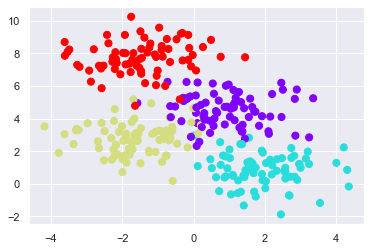

In [4]:
# Plotting the dataset points:

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'rainbow')

In [6]:
# Building Decision Tree model object:

tree = DecisionTreeClassifier()

In [11]:
# Creating a function to help in visualization of the output ot the classifier:

def visualize_classifier(model, X, y, ax = None, cmap = 'rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points:
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = cmap, clim = (y.min(), y.max()), zorder = 3)
    ax.axis('Tight')
    ax.axis('Off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Fit the estimator:
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num = 200),
                         np.linspace(*ylim, num = 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results:
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                          level = np.arange(n_classes + 1) - 0.5,
                          cmap = cmap, clim = (y.min(), y.max()), xorder = 1)
    ax.set(xlim = xlim, ylim = ylim)

C:\Users\Mitko\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'level', 'clim', 'xorder'


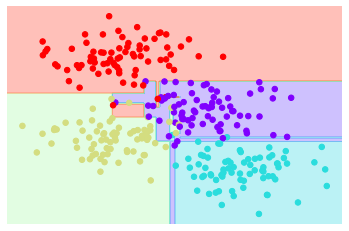

In [12]:
# Examining how the decision tree classification looks like:

visualize_classifier(DecisionTreeClassifier(), X, y)

In [32]:
# A group of functions that were taken directli from net from the author of the book that I am studing:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)
        
############################################################################################################
############################################################################################################

def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 5])

############################################################################################################
############################################################################################################

def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    
    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)
        interact(fit_randomized_tree, random_state=[0, 100]);

In [21]:
# Using some of the functions that were taken from the net:

plot_tree_interactive(X, y)

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

<function __main__.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

## Decision Trees and Overfitting:

In [34]:
# Using the ner functions to study overfitting:

randomized_tree_interactive(X, y)

## Ensembles of Estimators: Random Forest:

In [35]:
# Importing libraries:

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Using the BaggingClassifier for classification:

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators = 100, max_samples = 0.8, random_state = 1)

In [45]:
# Fitting the model:

bag.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=1000, random_state=1)

C:\Users\Mitko\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'level', 'clim', 'xorder'


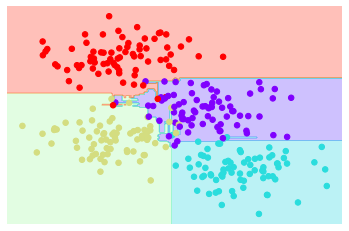

In [46]:
# Visualizing the results:

visualize_classifier(bag, X, y)

In [47]:
# Buiding RandomForest model object:

model = RandomForestClassifier(n_estimators = 100, random_state = 0)

C:\Users\Mitko\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'level', 'clim', 'xorder'


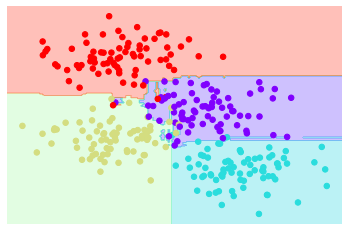

In [43]:
# Fitting the model:

visualize_classifier(model, X, y)